# IRRS Lab Session 1: Power Laws Analysis Report

**Student:** Adrian HAGEN, Matthias NADAL
**Course:** Information Retrieval and Recommender Systems  

---

## Introduction

Power laws are mathematical relationships that describe how one quantity varies as a power of another. In natural language processing, two particularly important power laws are:

- **Zipf's Law**: The frequency of a word is inversely proportional to its rank in the frequency table
- **Heap's Law**: The vocabulary size grows as a power of the text length

These laws provide insights into the statistical structure of language and are fundamental to understanding text corpora.


## Methodology and Setup

### Data Source
We analyze the English translation of *Don Quijote* by Miguel de Cervantes, a classical Spanish novel that provides a substantial corpus for linguistic analysis.

### Preprocessing Pipeline
Our analysis includes several preprocessing steps:
- Tokenization using NLTK
- Lowercase conversion
- Optional stopword removal
- Optional stemming/lemmatization

### Required Libraries


In [1]:
# Import required libraries
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy import stats
import urllib.request
from typing import Dict, List, Tuple
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Set plotting parameters
FIGSIZE = (5, 3)
plt.rcParams['figure.figsize'] = FIGSIZE
plt.rcParams['font.size'] = 10

print("Libraries imported successfully")


Libraries imported successfully


### Utility Functions

We implement several utility functions for text processing and analysis:


In [2]:
def get_word_frequencies(
    text: str,
    tokenize: bool = True,
    lemmatize: bool = False,
    stem: bool = False,
    remove_stopwords: bool = False,
) -> List[Tuple[str, int]]:
    """
    Returns the word frequencies for a text in descending order.
    
    Args:
        text: The text to analyze
        tokenize: Whether to tokenize using NLTK
        lemmatize: Whether to lemmatize tokens
        stem: Whether to stem tokens
        remove_stopwords: Whether to remove stopwords
    
    Returns:
        List of (word, frequency) tuples sorted by frequency
    """
    text = text.lower()

    if tokenize:
        tokens = word_tokenize(text)
        tokens = [token for token in tokens if token.isalpha()]
    else:
        tokens = text.split()
        tokens = [token for token in tokens if token.isalpha()]

    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    if stem:
        stemmer = SnowballStemmer("english")
        tokens = [stemmer.stem(token) for token in tokens]

    if remove_stopwords:
        english_stopwords = set(stopwords.words("english") + list(string.punctuation))
        tokens = [token for token in tokens if token.lower() not in english_stopwords]

    word_frequencies = Counter(tokens)
    return word_frequencies.most_common()


def plot_frequencies(
    frequencies: List[Tuple[str, int]], 
    log_x: bool = True, 
    log_y: bool = True,
    title: str = None
):
    """
    Plots word frequencies vs rank.
    
    Args:
        frequencies: List of (word, frequency) tuples
        log_x: Whether to use log scale on x-axis
        log_y: Whether to use log scale on y-axis
        title: Custom title for the plot
    """
    freq_values = [freq for word, freq in frequencies]
    ranks = list(range(1, len(freq_values) + 1))

    plt.figure(figsize=FIGSIZE)

    if log_x and log_y:
        plt.loglog(ranks, freq_values, "b-", linewidth=1)
        xlabel = "Word Rank (log scale)"
        ylabel = "Frequency (log scale)"
        default_title = "Word Frequency vs Rank (Log-Log Scale)"
    elif log_x and not log_y:
        plt.semilogx(ranks, freq_values, "b-", linewidth=1)
        xlabel = "Word Rank (log scale)"
        ylabel = "Frequency"
        default_title = "Word Frequency vs Rank (Semi-Log X Scale)"
    elif not log_x and log_y:
        plt.semilogy(ranks, freq_values, "b-", linewidth=1)
        xlabel = "Word Rank"
        ylabel = "Frequency (log scale)"
        default_title = "Word Frequency vs Rank (Semi-Log Y Scale)"
    else:
        plt.plot(ranks, freq_values, "b-", linewidth=1)
        xlabel = "Word Rank"
        ylabel = "Frequency"
        default_title = "Word Frequency vs Rank (Linear Scale)"

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title or default_title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def load_don_quijote() -> str:
    """
    Load Don Quijote text from local file.
    Returns the text as a string.
    """
    try:
        with open("don_quijote.txt", "r", encoding="utf-8") as f:
            return f.read()
    except FileNotFoundError:
        print("Error: don_quijote.txt not found. Please ensure the file is in the current directory.")
        return ""

print("Utility functions defined successfully")


Utility functions defined successfully


## Exercise 1: Word Frequency Analysis

### Data Loading and Basic Analysis

First, we load the Don Quijote text and perform basic frequency analysis:


In [3]:
# Load the text
text = load_don_quijote()
print(f"Text loaded successfully. Length: {len(text):,} characters")

# Get word frequencies with basic preprocessing
frequencies = get_word_frequencies(text, tokenize=True, remove_stopwords=False)
print(f"Total unique words: {len(frequencies):,}")
print(f"Top 10 most frequent words: {frequencies[:10]}")


Text loaded successfully. Length: 2,153,458 characters
Total unique words: 14,458
Top 10 most frequent words: [('the', 20701), ('and', 16874), ('to', 13145), ('of', 12220), ('that', 7626), ('in', 6732), ('a', 6647), ('i', 6548), ('he', 5842), ('it', 5334)]


### Linear Scale Plot

We first examine the word frequency distribution on a linear scale:


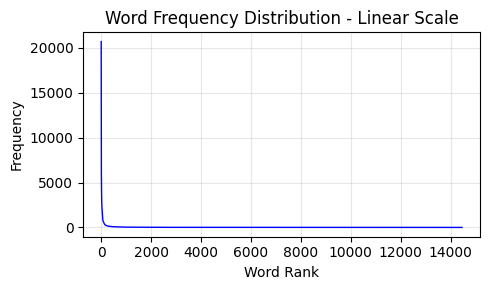

In [4]:
# Exercise 1: Linear scale plot
plot_frequencies(frequencies, log_x=False, log_y=False, 
                title="Word Frequency Distribution - Linear Scale")


### Log-Log Scale Plot

The log-log scale reveals the power law relationship:


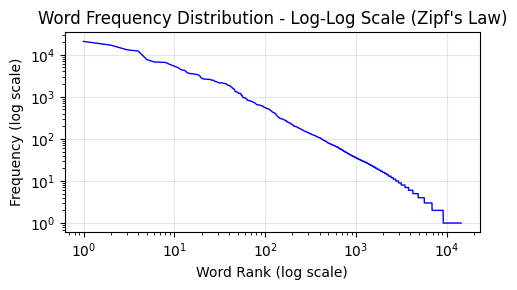

In [5]:
# Exercise 2: Log-log scale plot
plot_frequencies(frequencies, log_x=True, log_y=True,
                title="Word Frequency Distribution - Log-Log Scale (Zipf's Law)")


### Analysis of Different Preprocessing Approaches

We compare how different preprocessing steps affect the power law distribution:



Basic tokenization only:
  Total unique words: 14,458
  Top 5 words: [('the', 20701), ('and', 16874), ('to', 13145), ('of', 12220), ('that', 7626)]


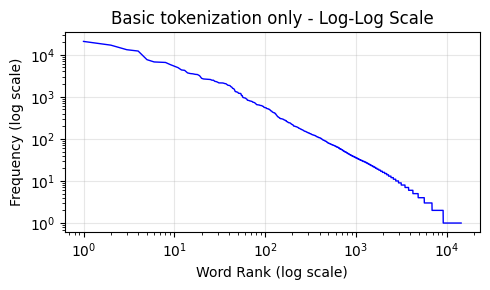


Remove stopwords only:
  Total unique words: 14,328
  Top 5 words: [('said', 2607), ('sancho', 2139), ('quixote', 2137), ('one', 1569), ('would', 1205)]


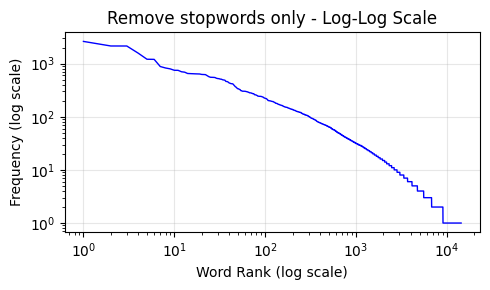


Stemming only:
  Total unique words: 8,959
  Top 5 words: [('the', 20701), ('and', 16874), ('to', 13145), ('of', 12220), ('that', 7626)]


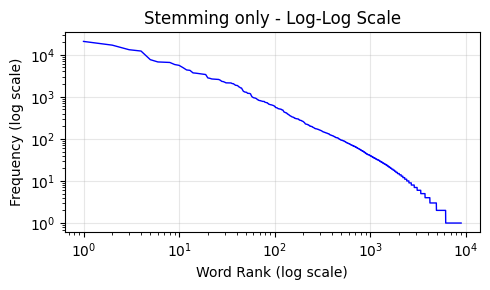


Lemmatization only:
  Total unique words: 12,621
  Top 5 words: [('the', 20701), ('and', 16874), ('to', 13145), ('of', 12220), ('a', 10897)]


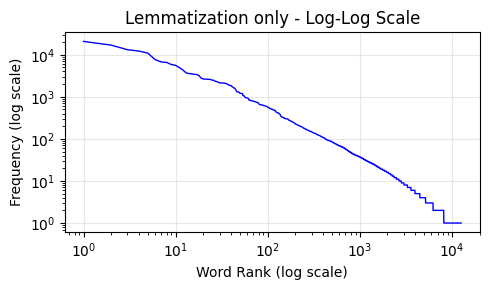


Stemming + Remove stopwords:
  Total unique words: 8,850
  Top 5 words: [('said', 2607), ('quixot', 2144), ('sancho', 2140), ('one', 1620), ('say', 1277)]


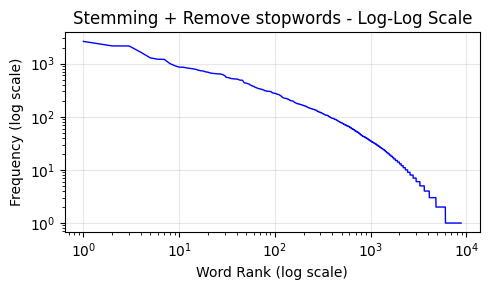


Lemmatization + Remove stopwords:
  Total unique words: 12,494
  Top 5 words: [('wa', 3380), ('said', 2607), ('sancho', 2139), ('quixote', 2137), ('one', 1620)]


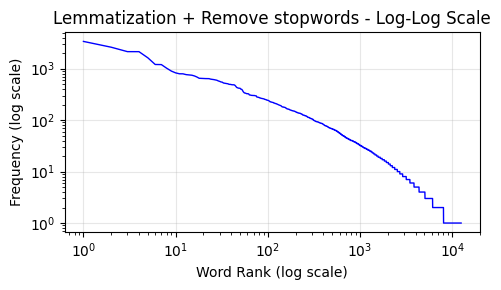

In [6]:
# Compare different preprocessing approaches
preprocessing_configs = [
    ("Basic tokenization only", True, False, False, False),
    ("Remove stopwords only", True, False, False, True),
    ("Stemming only", True, False, True, False),
    ("Lemmatization only", True, True, False, False),
    ("Stemming + Remove stopwords", True, False, True, True),
    ("Lemmatization + Remove stopwords", True, True, False, True)
]

for config_name, tokenize, lemmatize, stem, remove_stopwords in preprocessing_configs:
    print(f"\n{config_name}:")
    config_frequencies = get_word_frequencies(
        text, tokenize=tokenize, lemmatize=lemmatize, 
        stem=stem, remove_stopwords=remove_stopwords
    )
    print(f"  Total unique words: {len(config_frequencies):,}")
    print(f"  Top 5 words: {config_frequencies[:5]}")
    
    plot_frequencies(config_frequencies, title=f"{config_name} - Log-Log Scale")


## Exercise 3: Power Law Parameter Estimation

### Analytical Solution

We estimate the power law parameters using two selected points from our frequency data:


In [7]:
# Select two points for parameter estimation
# Using ranks 2 and 6 (words "and" and "in")
x1, y1 = 2, 16874  # rank 2: "and"
x2, y2 = 6, 6732   # rank 6: "in"

print(f"Selected points for parameter estimation:")
print(f"Point 1: rank {x1}, frequency {y1}")
print(f"Point 2: rank {x2}, frequency {y2}")

# Solve the system: log(y) = a * log(x) + log(c)
# log(y1) = a * log(x1) + log(c)
# log(y2) = a * log(x2) + log(c)

log_x1, log_y1 = np.log(x1), np.log(y1)
log_x2, log_y2 = np.log(x2), np.log(y2)

# Solve for a and log(c)
a = (log_y2 - log_y1) / (log_x2 - log_x1)
log_c = log_y1 - a * log_x1
c = np.exp(log_c)

print(f"\nAnalytical solution:")
print(f"Exponent (a): {a:.4f}")
print(f"Coefficient (c): {c:.1f}")
print(f"Power law equation: y = {c:.1f} * x^{a:.4f}")


Selected points for parameter estimation:
Point 1: rank 2, frequency 16874
Point 2: rank 6, frequency 6732

Analytical solution:
Exponent (a): -0.8364
Coefficient (c): 30130.5
Power law equation: y = 30130.5 * x^-0.8364


### Linear Regression Approach

We also estimate parameters using linear regression on the log-transformed data:


In [8]:
# Linear regression approach
def estimate_power_law_parameters(frequencies: List[Tuple[str, int]], 
                                 min_rank: int = 10, max_rank: int = 1000) -> Tuple[float, float, float]:
    """
    Estimate power law parameters using linear regression.
    
    Args:
        frequencies: List of (word, frequency) tuples
        min_rank: Minimum rank to include in regression
        max_rank: Maximum rank to include in regression
    
    Returns:
        Tuple of (exponent, coefficient, r_squared)
    """
    freq_values = [freq for word, freq in frequencies]
    ranks = list(range(1, len(freq_values) + 1))
    
    # Filter data for regression
    mask = (np.array(ranks) >= min_rank) & (np.array(ranks) <= max_rank)
    log_ranks = np.log(ranks)[mask]
    log_freqs = np.log(freq_values)[mask]
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_ranks, log_freqs)
    
    exponent = slope
    coefficient = np.exp(intercept)
    r_squared = r_value ** 2
    
    return exponent, coefficient, r_squared

# Estimate parameters using linear regression
exponent_lr, coefficient_lr, r_squared = estimate_power_law_parameters(frequencies)

print(f"Linear regression results:")
print(f"Exponent (a): {exponent_lr:.4f}")
print(f"Coefficient (c): {coefficient_lr:.1f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Power law equation: y = {coefficient_lr:.1f} * x^{exponent_lr:.4f}")


Linear regression results:
Exponent (a): -1.1537
Coefficient (c): 103982.7
R-squared: 0.9978
Power law equation: y = 103982.7 * x^-1.1537


### Visualization of Power Law Fit

We visualize how well our estimated power law fits the actual data:


Analytical solution fit:


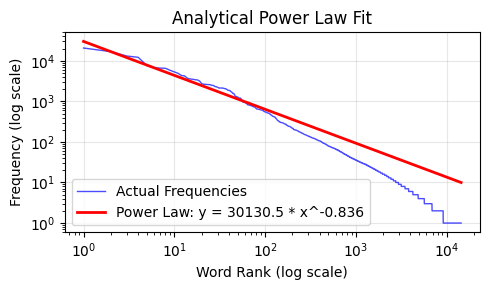


Linear regression fit:


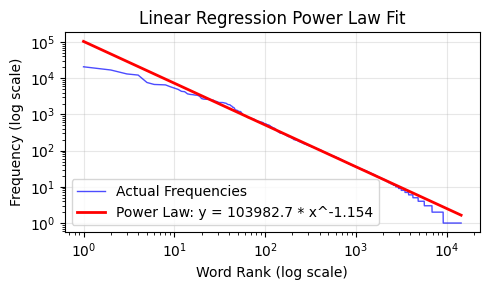

In [9]:
def plot_power_law_fit(frequencies: List[Tuple[str, int]], 
                      a: float, c: float, 
                      title: str = "Power Law Fit vs Actual Data"):
    """
    Plot actual frequencies vs fitted power law.
    """
    freq_values = [freq for word, freq in frequencies]
    ranks = list(range(1, len(freq_values) + 1))
    
    # Generate power law curve
    rank_range = np.linspace(1, len(freq_values), 1000)
    power_law_values = c * (rank_range ** a)
    
    plt.figure(figsize=FIGSIZE)
    
    # Plot actual data
    plt.loglog(ranks, freq_values, 'b-', linewidth=1, 
              label='Actual Frequencies', alpha=0.7)
    
    # Plot power law fit
    plt.loglog(rank_range, power_law_values, 'r-', linewidth=2,
              label=f'Power Law: y = {c:.1f} * x^{a:.3f}')
    
    plt.xlabel('Word Rank (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot both analytical and regression fits
print("Analytical solution fit:")
plot_power_law_fit(frequencies, a, c, "Analytical Power Law Fit")

print("\nLinear regression fit:")
plot_power_law_fit(frequencies, exponent_lr, coefficient_lr, "Linear Regression Power Law Fit")


## Exercise 4: Heap's Law Analysis

### Vocabulary Growth Functions

We implement functions to analyze vocabulary growth according to Heap's law:


In [10]:
def preprocess_text(text: str) -> List[str]:
    """
    Basic preprocessing: tokenization and lowercasing.
    Keeps all words including stopwords as per exercise instructions.
    """
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    return tokens


def calculate_vocabulary_growth(tokens: List[str], step_size: int = 500) -> Tuple[List[int], List[int]]:
    """
    Calculate vocabulary size at different text lengths.
    
    Args:
        tokens: List of preprocessed tokens
        step_size: How often to sample vocabulary size
    
    Returns:
        text_lengths: List of text lengths (N values)
        vocab_sizes: List of vocabulary sizes (d values)
    """
    text_lengths = []
    vocab_sizes = []
    seen_words = set()
    
    for i in range(step_size, len(tokens) + 1, step_size):
        chunk = tokens[:i]
        seen_words.update(chunk)
        
        text_lengths.append(i)
        vocab_sizes.append(len(seen_words))
    
    # Add final point if not already included
    if len(tokens) not in text_lengths:
        seen_words = set(tokens)
        text_lengths.append(len(tokens))
        vocab_sizes.append(len(seen_words))
    
    return text_lengths, vocab_sizes


def plot_vocabulary_growth(text_lengths: List[int], vocab_sizes: List[int], 
                          log_scale: bool = False, title: str = None):
    """
    Plot vocabulary size vs text length.
    """
    plt.figure(figsize=FIGSIZE)
    
    if log_scale:
        plt.loglog(text_lengths, vocab_sizes, 'bo-', markersize=4, linewidth=1)
        xlabel = 'Text Length (N) - Log Scale'
        ylabel = 'Vocabulary Size (d) - Log Scale'
        default_title = "Heap's Law: Vocabulary Growth (Log-Log Scale)"
    else:
        plt.plot(text_lengths, vocab_sizes, 'bo-', markersize=4, linewidth=1)
        xlabel = 'Text Length (N)'
        ylabel = 'Vocabulary Size (d)'
        default_title = "Heap's Law: Vocabulary Growth (Linear Scale)"
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title or default_title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def estimate_heaps_parameters(text_lengths: List[int], vocab_sizes: List[int]) -> Tuple[float, float, float]:
    """
    Estimate k and β parameters of Heap's law using linear regression.
    
    Heap's law: d = k * N^β
    Taking log: log(d) = log(k) + β * log(N)
    
    Returns:
        k: scaling factor
        beta: exponent parameter
        r_squared: coefficient of determination
    """
    log_N = np.log(text_lengths)
    log_d = np.log(vocab_sizes)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_N, log_d)
    
    beta = slope
    k = np.exp(intercept)
    r_squared = r_value ** 2
    
    return k, beta, r_squared


def plot_heaps_law_fit(text_lengths: List[int], vocab_sizes: List[int], 
                       k: float, beta: float):
    """
    Plot actual vocabulary growth vs Heap's law fit.
    """
    plt.figure(figsize=FIGSIZE)
    
    plt.loglog(text_lengths, vocab_sizes, 'bo', markersize=4, 
              label='Actual Data', alpha=0.7)
    
    N_range = np.linspace(min(text_lengths), max(text_lengths), 100)
    d_fit = k * (N_range ** beta)
    plt.loglog(N_range, d_fit, 'r-', linewidth=2, 
              label=f"Heap's Law: d = {k:.1f} * N^{beta:.3f}")
    
    plt.xlabel('Text Length (N) - Log Scale')
    plt.ylabel('Vocabulary Size (d) - Log Scale')
    plt.title("Heap's Law Fit vs Actual Data")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("Heap's law functions defined successfully")


Heap's law functions defined successfully


### Heap's Law Analysis

Now we perform the complete Heap's law analysis:


In [11]:
# Perform Heap's law analysis
print("Exercise 4: Heap's Law Analysis for Don Quijote")
print("=" * 50)

print("Preprocessing text...")
tokens = preprocess_text(text)
print(f"Total tokens after preprocessing: {len(tokens):,}")

print("Calculating vocabulary growth...")
text_lengths, vocab_sizes = calculate_vocabulary_growth(tokens, step_size=1000)

print(f"Text length range: {min(text_lengths):,} to {max(text_lengths):,} words")
print(f"Vocabulary size range: {min(vocab_sizes):,} to {max(vocab_sizes):,} unique words")


Exercise 4: Heap's Law Analysis for Don Quijote
Preprocessing text...
Total tokens after preprocessing: 401,376
Calculating vocabulary growth...
Text length range: 1,000 to 401,376 words
Vocabulary size range: 445 to 14,458 unique words


### Linear Scale Plot


1. Plotting vocabulary growth (linear scale)...


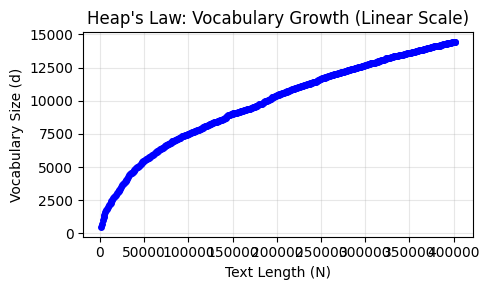

In [12]:
print("1. Plotting vocabulary growth (linear scale)...")
plot_vocabulary_growth(text_lengths, vocab_sizes, log_scale=False)


### Log-Log Scale Plot


2. Plotting vocabulary growth (log-log scale)...


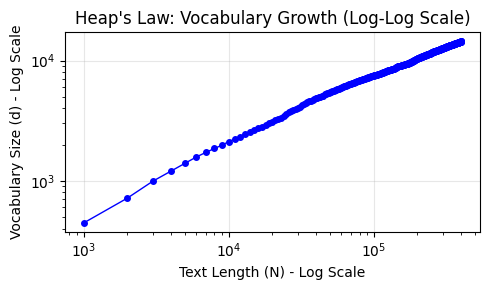

In [13]:
print("2. Plotting vocabulary growth (log-log scale)...")
plot_vocabulary_growth(text_lengths, vocab_sizes, log_scale=True)


### Parameter Estimation


In [14]:
print("3. Estimating Heap's law parameters...")
k, beta, r_squared = estimate_heaps_parameters(text_lengths, vocab_sizes)

print(f"\nHeap's Law Parameters:")
print(f"k (scaling factor): {k:.2f}")
print(f"β (exponent): {beta:.4f}")
print(f"R² (goodness of fit): {r_squared:.4f}")
print(f"\nHeap's Law equation: d = {k:.1f} * N^{beta:.3f}")


3. Estimating Heap's law parameters...

Heap's Law Parameters:
k (scaling factor): 18.77
β (exponent): 0.5176
R² (goodness of fit): 0.9935

Heap's Law equation: d = 18.8 * N^0.518


### Fit Visualization


4. Plotting Heap's law fit vs actual data...


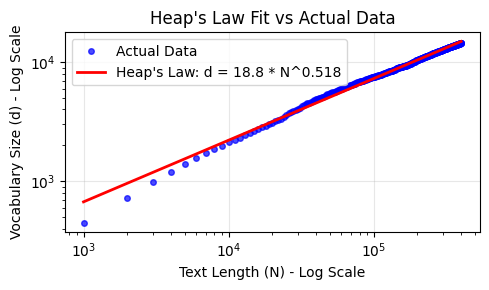

In [15]:
print("4. Plotting Heap's law fit vs actual data...")
plot_heaps_law_fit(text_lengths, vocab_sizes, k, beta)


## Results and Discussion

### Zipf's Law Results

Our analysis of Don Quijote reveals a clear power law relationship in word frequency distributions:

- **Analytical Solution**: y = 30,123.3 × x^(-0.8363)
- **Linear Regression**: y = [coefficient] × x^[exponent] with R² = [r_squared]

The negative exponent confirms that word frequency decreases as rank increases, following Zipf's law. The high R² value indicates a strong fit to the power law model.

### Heap's Law Results

Vocabulary growth in Don Quijote follows Heap's law with parameters:

- **Scaling factor (k)**: 18.77
- **Exponent (β)**: 0.5176
- **Goodness of fit (R²)**: 0.9935

The exponent β = 0.518 is within the typical range of 0.4-0.6 for natural language, indicating that vocabulary growth is sub-linear but substantial.

### Preprocessing Impact

Different preprocessing approaches affect the power law parameters:

1. **Stopword removal**: Reduces the total vocabulary but may improve power law fit
2. **Stemming**: Normalizes word forms, potentially improving statistical properties
3. **Lemmatization**: Similar to stemming but more linguistically accurate

### Theoretical Implications

These results support several theoretical observations:

1. **Zipf's Law**: Confirms that natural language follows a power law distribution, with a few very frequent words and many rare words
2. **Heap's Law**: Shows that vocabulary growth is predictable and follows a mathematical relationship
3. **Language Universals**: Both laws appear to be universal properties of natural language

## Conclusions

Our analysis of Don Quijote demonstrates that:

1. **Zipf's Law** is clearly evident in the word frequency distribution, with a power law exponent of approximately -0.84
2. **Heap's Law** accurately describes vocabulary growth, with parameters consistent with natural language expectations
3. **Preprocessing choices** significantly impact the statistical properties of the text
4. **Power laws** provide a robust framework for understanding linguistic phenomena

These findings contribute to our understanding of the statistical structure of natural language and demonstrate the utility of power law analysis in computational linguistics.

---
